# Modeling Using VAR Model (Vector Autoregression Model)

In [316]:
#import data

import pandas as pd
import numpy 
import statsmodels
import matplotlib.pyplot as plt

df = pd.read_csv('West_Africa_temperature_1980_2022.csv')

In [317]:
df.head()

STATION  LATITUDE  LONGITUDE  ELEVATION       COUNTRY  \
0  UV000005502    13.580     -2.430      340.0  Burkina Faso   
1  UV000005507    12.070      0.350      301.0  Burkina Faso   
2  UV000005522    10.330     -3.180      333.0  Burkina Faso   
3  UV000065501    14.033     -0.033      277.0  Burkina Faso   
4  UV000065516    11.750     -2.933      271.0  Burkina Faso   

   1980-01-01 00:00:00  1980-01-02 00:00:00  1980-01-03 00:00:00  \
0                23.89                24.44                24.44   
1                24.44                24.44                25.00   
2                26.67                27.22                26.11   
3                21.67                24.44                22.78   
4                24.44                26.11                25.00   

   1980-01-04 00:00:00  1980-01-05 00:00:00  ...  2022-12-22 00:00:00  \
0                23.33                23.89  ...                24.44   
1                25.00                25.56  ...                23.33   
2                26.11                27.22  ...                25.00   
3                23.33                23.89  ...                32.22   
4                24.44                25.56  ...                23.89   

   2022-12-23 00:00:00  2022-12-24 00:00:00  2022-12-25 00:00:00  \
0                23.33                23.33                23.33   
1                23.33                22.78                22.78   
2                25.00                23.89                23.33   
3                32.22                32.22                32.22   
4                23.89                22.78                22.78   

   2022-12-26 00:00:00  2022-12-27 00:00:00  2022-12-28 00:00:00  \
0                22.78                25.00                25.56   
1                22.78                24.44                25.00   
2                22.78                24.44                25.56   
3                32.22                32.22                32.22   
4                22.22                24.44                25.00   

   2022-12-29 00:00:00  2022-12-30 00:00:00  2022-12-31 00:00:00  
0                25.00                25.00                24.44  
1                24.44                24.44                23.33  
2                25.56                25.56                25.00  
3                32.22                32.22                32.22  
4                25.00                23.89                23.33  

[5 rows x 15711 columns]

In [318]:
#Transpose data to have the dates as index.

df = df.T

In [319]:
df

0             1             2             3   \
STATION               UV000005502   UV000005507   UV000005522   UV000065501   
LATITUDE                    13.58         12.07         10.33        14.033   
LONGITUDE                   -2.43          0.35         -3.18        -0.033   
ELEVATION                   340.0         301.0         333.0         277.0   
COUNTRY              Burkina Faso  Burkina Faso  Burkina Faso  Burkina Faso   
...                           ...           ...           ...           ...   
2022-12-27 00:00:00          25.0         24.44         24.44         32.22   
2022-12-28 00:00:00         25.56          25.0         25.56         32.22   
2022-12-29 00:00:00          25.0         24.44         25.56         32.22   
2022-12-30 00:00:00          25.0         24.44         25.56         32.22   
2022-12-31 00:00:00         24.44         23.33          25.0         32.22   

                               4             5             6             7   \
STATION               UV000065516   UVM00065503   UVM00065510   UVM00065518   
LATITUDE                    11.75        12.353         11.16         11.15   
LONGITUDE                  -2.933        -1.512        -4.331         -1.15   
ELEVATION                   271.0         316.1         460.6         322.0   
COUNTRY              Burkina Faso  Burkina Faso  Burkina Faso  Burkina Faso   
...                           ...           ...           ...           ...   
2022-12-27 00:00:00         24.44         24.44         25.56         23.89   
2022-12-28 00:00:00          25.0          25.0         26.11         25.56   
2022-12-29 00:00:00          25.0         25.56         26.11         25.56   
2022-12-30 00:00:00         23.89         24.44         25.56         25.56   
2022-12-31 00:00:00         23.33         24.44         24.44         24.44   

                              8            9   ...           62           63  \
STATION              IV000005557  IV000005562  ...  SGM00061679  SGM00061695   
LATITUDE                    6.13         6.65  ...       14.147       12.556   
LONGITUDE                  -5.95         -4.7  ...      -16.051      -16.282   
ELEVATION                  205.0        110.0  ...          7.9         22.9   
COUNTRY              Ivory Coast  Ivory Coast  ...      Senegal      Senegal   
...                          ...          ...  ...          ...          ...   
2022-12-27 00:00:00         25.0        25.56  ...        26.11        23.33   
2022-12-28 00:00:00        27.22        27.78  ...        23.89        22.78   
2022-12-29 00:00:00        26.67        27.22  ...        24.44        23.33   
2022-12-30 00:00:00        25.56        26.11  ...        26.11        22.78   
2022-12-31 00:00:00        26.67        24.44  ...        26.67        24.44   

                              64           65           66            67  \
STATION              SGM00061697  SGM00061698  SGM00061699   SL000061856   
LATITUDE                   12.41       12.883       12.572         8.617   
LONGITUDE                -16.746      -14.967       -12.22         -13.2   
ELEVATION                   15.8         10.0        178.0          27.0   
COUNTRY                  Senegal      Senegal      Senegal  Sierra Leone   
...                          ...          ...          ...           ...   
2022-12-27 00:00:00        22.78        25.56        28.33         26.67   
2022-12-28 00:00:00        22.78        23.89        28.33         26.67   
2022-12-29 00:00:00        22.78        24.44        23.89         27.22   
2022-12-30 00:00:00        23.33        22.22        24.44         26.67   
2022-12-31 00:00:00        24.44        25.56        27.22         27.22   

                              68           69           70           71  
STATION              LIM00065660  GHM00065472  CVM00008594  GV000001832  
LATITUDE                   6.234        5.605       16.741         9.57  
LONGITUDE                -10.362     

In [320]:
# Set the second row as the header
new_header = df.iloc[0]  # Grab the first row for the header

df = df[1:]  # Take the data less the header row

df.columns = new_header  #Set the header row as the df header

df_main = df[4:] #Neglect the latitude, longitude, elevation and coutry as they are all constant and not needed for timeseries

In [321]:
df_main.head()

STATION             UV000005502 UV000005507 UV000005522 UV000065501  \
1980-01-01 00:00:00       23.89       24.44       26.67       21.67   
1980-01-02 00:00:00       24.44       24.44       27.22       24.44   
1980-01-03 00:00:00       24.44        25.0       26.11       22.78   
1980-01-04 00:00:00       23.33        25.0       26.11       23.33   
1980-01-05 00:00:00       23.89       25.56       27.22       23.89   

STATION             UV000065516 UVM00065503 UVM00065510 UVM00065518  \
1980-01-01 00:00:00       24.44       23.33       24.44       26.67   
1980-01-02 00:00:00       26.11        25.0       26.11       26.67   
1980-01-03 00:00:00        25.0       25.56        25.0       26.67   
1980-01-04 00:00:00       24.44       24.44        25.0       26.67   
1980-01-05 00:00:00       25.56       25.56       26.67       26.67   

STATION             IV000005557 IV000005562  ... SGM00061679 SGM00061695  \
1980-01-01 00:00:00       25.56       24.44  ...       26.67       23.33   
1980-01-02 00:00:00       25.56       27.22  ...       26.67       24.44   
1980-01-03 00:00:00       26.11       27.22  ...       26.67       23.33   
1980-01-04 00:00:00       26.67       26.67  ...       26.67       21.67   
1980-01-05 00:00:00       26.11       26.67  ...       24.44       24.44   

STATION             SGM00061697 SGM00061698 SGM00061699 SL000061856  \
1980-01-01 00:00:00       26.67       28.89        30.0       26.67   
1980-01-02 00:00:00       26.67       27.78       26.11       26.67   
1980-01-03 00:00:00       26.67       28.89       27.78       26.67   
1980-01-04 00:00:00       26.67       23.33       28.33       26.67   
1980-01-05 00:00:00       26.67       23.33       27.22       26.67   

STATION             LIM00065660 GHM00065472 CVM00008594 GV000001832  
1980-01-01 00:00:00       27.78       26.11       21.67       26.11  
1980-01-02 00:00:00       27.78       28.89       22.22       26.11  
1980-01-03 00:00:00       27.78       28.89       21.11       26.11  
1980-01-04 00:00:00       27.78       28.89       21.67       26.11  
1980-01-05 00:00:00       27.78       28.89       21.67       26.11  

[5 rows x 72 columns]

In [322]:
#Check the type of values in the data frame

df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15706 entries, 1980-01-01 00:00:00 to 2022-12-31 00:00:00
Data columns (total 72 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UV000005502  15706 non-null  object
 1   UV000005507  15706 non-null  object
 2   UV000005522  15706 non-null  object
 3   UV000065501  15706 non-null  object
 4   UV000065516  15706 non-null  object
 5   UVM00065503  15706 non-null  object
 6   UVM00065510  15706 non-null  object
 7   UVM00065518  15706 non-null  object
 8   IV000005557  15706 non-null  object
 9   IV000005562  15706 non-null  object
 10  IV000005592  15706 non-null  object
 11  IV000065585  15706 non-null  object
 12  IV000065599  15706 non-null  object
 13  IVM00065545  15706 non-null  object
 14  IVM00065560  15706 non-null  object
 15  IVM00065563  15706 non-null  object
 16  IVM00065578  15706 non-null  object
 17  IVM00065594  15706 non-null  object
 18  NG000001036  15706 non-null  object
 19

In [323]:
#Lets convert the objects to float

df_main = df_main.astype(float)

In [324]:
df_main.head()

STATION              UV000005502  UV000005507  UV000005522  UV000065501  \
1980-01-01 00:00:00        23.89        24.44        26.67        21.67   
1980-01-02 00:00:00        24.44        24.44        27.22        24.44   
1980-01-03 00:00:00        24.44        25.00        26.11        22.78   
1980-01-04 00:00:00        23.33        25.00        26.11        23.33   
1980-01-05 00:00:00        23.89        25.56        27.22        23.89   

STATION              UV000065516  UVM00065503  UVM00065510  UVM00065518  \
1980-01-01 00:00:00        24.44        23.33        24.44        26.67   
1980-01-02 00:00:00        26.11        25.00        26.11        26.67   
1980-01-03 00:00:00        25.00        25.56        25.00        26.67   
1980-01-04 00:00:00        24.44        24.44        25.00        26.67   
1980-01-05 00:00:00        25.56        25.56        26.67        26.67   

STATION              IV000005557  IV000005562  ...  SGM00061679  SGM00061695  \
1980-01-01 00:00:00        25.56        24.44  ...        26.67        23.33   
1980-01-02 00:00:00        25.56        27.22  ...        26.67        24.44   
1980-01-03 00:00:00        26.11        27.22  ...        26.67        23.33   
1980-01-04 00:00:00        26.67        26.67  ...        26.67        21.67   
1980-01-05 00:00:00        26.11        26.67  ...        24.44        24.44   

STATION              SGM00061697  SGM00061698  SGM00061699  SL000061856  \
1980-01-01 00:00:00        26.67        28.89        30.00        26.67   
1980-01-02 00:00:00        26.67        27.78        26.11        26.67   
1980-01-03 00:00:00        26.67        28.89        27.78        26.67   
1980-01-04 00:00:00        26.67        23.33        28.33        26.67   
1980-01-05 00:00:00        26.67        23.33        27.22        26.67   

STATION              LIM00065660  GHM00065472  CVM00008594  GV000001832  
1980-01-01 00:00:00        27.78        26.11        21.67        26.11  
1980-01-02 00:00:00        27.78        28.89        22.22        26.11  
1980-01-03 00:00:00        27.78        28.89        21.11        26.11  
1980-01-04 00:00:00        27.78        28.89        21.67        26.11  
1980-01-05 00:00:00        27.78        28.89        21.67        26.11  

[5 rows x 72 columns]

In [325]:
#Convert index to datatime

df_main.index = pd.to_datetime(df_main.index, errors='coerce')

In [326]:
df_main.head()

STATION     UV000005502  UV000005507  UV000005522  UV000065501  UV000065516  \
1980-01-01        23.89        24.44        26.67        21.67        24.44   
1980-01-02        24.44        24.44        27.22        24.44        26.11   
1980-01-03        24.44        25.00        26.11        22.78        25.00   
1980-01-04        23.33        25.00        26.11        23.33        24.44   
1980-01-05        23.89        25.56        27.22        23.89        25.56   

STATION     UVM00065503  UVM00065510  UVM00065518  IV000005557  IV000005562  \
1980-01-01        23.33        24.44        26.67        25.56        24.44   
1980-01-02        25.00        26.11        26.67        25.56        27.22   
1980-01-03        25.56        25.00        26.67        26.11        27.22   
1980-01-04        24.44        25.00        26.67        26.67        26.67   
1980-01-05        25.56        26.67        26.67        26.11        26.67   

STATION     ...  SGM00061679  SGM00061695  SGM00061697  SGM00061698  \
1980-01-01  ...        26.67        23.33        26.67        28.89   
1980-01-02  ...        26.67        24.44        26.67        27.78   
1980-01-03  ...        26.67        23.33        26.67        28.89   
1980-01-04  ...        26.67        21.67        26.67        23.33   
1980-01-05  ...        24.44        24.44        26.67        23.33   

STATION     SGM00061699  SL000061856  LIM00065660  GHM00065472  CVM00008594  \
1980-01-01        30.00        26.67        27.78        26.11        21.67   
1980-01-02        26.11        26.67        27.78        28.89        22.22   
1980-01-03        27.78        26.67        27.78        28.89        21.11   
1980-01-04        28.33        26.67        27.78        28.89        21.67   
1980-01-05        27.22        26.67        27.78        28.89        21.67   

STATION     GV000001832  
1980-01-01        26.11  
1980-01-02        26.11  
1980-01-03        26.11  
1980-01-04        26.11  
1980-01-05        26.11  

[5 rows x 72 columns]

In [327]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15706 entries, 1980-01-01 to 2022-12-31
Data columns (total 72 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UV000005502  15706 non-null  float64
 1   UV000005507  15706 non-null  float64
 2   UV000005522  15706 non-null  float64
 3   UV000065501  15706 non-null  float64
 4   UV000065516  15706 non-null  float64
 5   UVM00065503  15706 non-null  float64
 6   UVM00065510  15706 non-null  float64
 7   UVM00065518  15706 non-null  float64
 8   IV000005557  15706 non-null  float64
 9   IV000005562  15706 non-null  float64
 10  IV000005592  15706 non-null  float64
 11  IV000065585  15706 non-null  float64
 12  IV000065599  15706 non-null  float64
 13  IVM00065545  15706 non-null  float64
 14  IVM00065560  15706 non-null  float64
 15  IVM00065563  15706 non-null  float64
 16  IVM00065578  15706 non-null  float64
 17  IVM00065594  15706 non-null  float64
 18  NG000001036  15706 non-null  

## Is the Data Stationery?

In [328]:
#Find out if the time series data is stationery.

#Stationarity in a time series refers to the property where the statistical properties of the 
#series — such as mean, variance, and autocorrelation — are constant over time. 
#This concept is crucial in time series analysis, particularly for modeling and forecasting. 

from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    result = adfuller(data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

# Apply the test on each series
for column in df_main.columns:
    print(f"Station: {column}")
    check_stationarity(df_main[column])
    print("\n")

Station: UV000005502
ADF Statistic: -14.608482
p-value: 0.000000


Station: UV000005507
ADF Statistic: -13.597260
p-value: 0.000000


Station: UV000005522
ADF Statistic: -12.677597
p-value: 0.000000


Station: UV000065501
ADF Statistic: -14.058749
p-value: 0.000000


Station: UV000065516
ADF Statistic: -13.461369
p-value: 0.000000


Station: UVM00065503
ADF Statistic: -14.865656
p-value: 0.000000


Station: UVM00065510
ADF Statistic: -12.790538
p-value: 0.000000


Station: UVM00065518
ADF Statistic: -12.341820
p-value: 0.000000


Station: IV000005557
ADF Statistic: -10.318544
p-value: 0.000000


Station: IV000005562
ADF Statistic: -11.306980
p-value: 0.000000


Station: IV000005592
ADF Statistic: -9.152275
p-value: 0.000000


Station: IV000065585
ADF Statistic: -9.867955
p-value: 0.000000


Station: IV000065599
ADF Statistic: -9.535234
p-value: 0.000000


Station: IVM00065545
ADF Statistic: -9.441641
p-value: 0.000000


Station: IVM00065560
ADF Statistic: -9.491261
p-value: 0.000000




For the above result, we can see that the p-values are less than 0.05 which suggest that the station (0.00000 p-value) are stationery. And since we also have a very strong negative ADF value, it also suggest that the time series is stationery. 


## What's The Order Of VAR Model?

In [329]:
#Determining the order of VAR Model

#In simpler terms, it's about deciding how many past observations (lags) 
#should be considered to predict future values in the time series.

from statsmodels.tsa.api import VAR

model = VAR(df_main)
for i in [1,2,3,4,5]: # Check different lag orders
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Lag Order = 1
AIC :  12.870719797204963
BIC :  15.434876184936817

Lag Order = 2
AIC :  10.821517877906336
BIC :  15.914987215870152

Lag Order = 3
AIC :  9.947118866016838
BIC :  17.57018125162128

Lag Order = 4
AIC :  9.504658605802376
BIC :  19.657594185954245

Lag Order = 5
AIC :  9.447455056950956
BIC :  22.130544028067124



From the above, we need an order with low AIC and Low BIC. We can see that Lag Order 4 is perfect. 

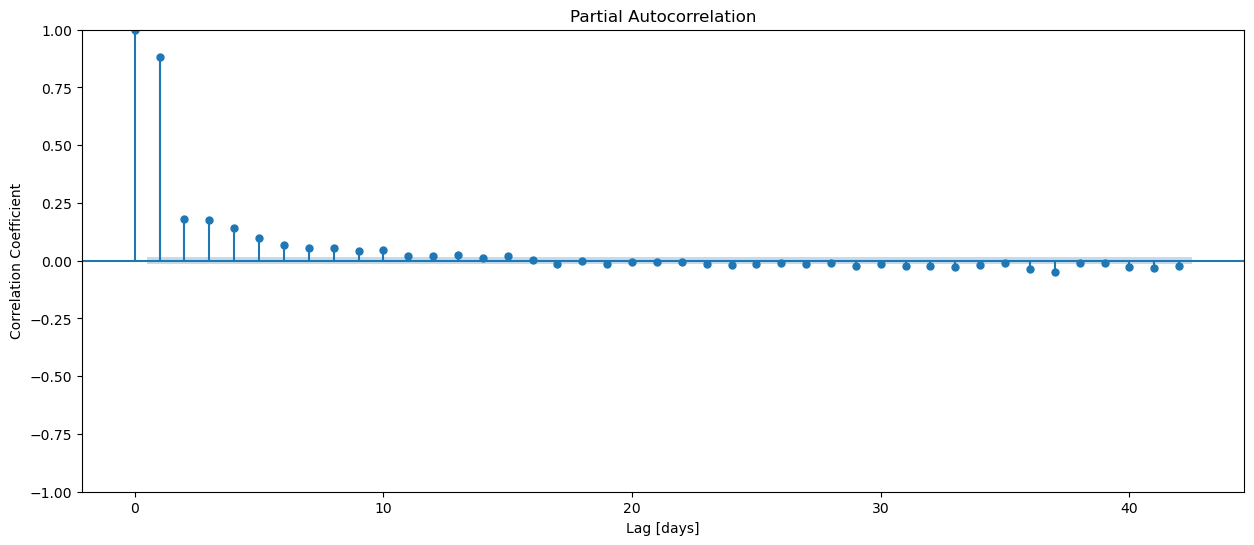

In [370]:
#ACF is a tool used in time series analysis to quantify 
#the correlation between observations in a time series dataset at different time lags.

fig, ax = plt.subplots(figsize=(15,6))
plot_pacf(df_main['UV000005502'], ax=ax)
plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient");

As can seen from the above, values around lag 10 are around 0 correlation. So picking 4 or 5 are the lag Order is good for the model.  

### Fit the model and check serial correlation

In [330]:
#Fit the model. Using lag 4

model_fitted = model.fit(4)

In [331]:
#Check for serial correlation

#Serial correlation (also known as autocorrelation) refers to the relationship 
#between observations of the same variable over different periods of time.

from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))


UV000005502 : 2.01
UV000005507 : 2.01
UV000005522 : 2.02
UV000065501 : 2.01
UV000065516 : 2.01
UVM00065503 : 2.01
UVM00065510 : 2.02
UVM00065518 : 2.02
IV000005557 : 2.01
IV000005562 : 2.02
IV000005592 : 2.01
IV000065585 : 2.01
IV000065599 : 2.01
IVM00065545 : 2.01
IVM00065560 : 2.01
IVM00065563 : 2.02
IVM00065578 : 2.02
IVM00065594 : 2.02
NG000001036 : 2.0
NG000001049 : 2.02
NG000001052 : 2.01
NG000001075 : 2.01
NG000001080 : 2.02
NG000001090 : 2.01
NG000061017 : 2.02
NG000061024 : 2.01
NG000061043 : 2.0
NG000061096 : 2.01
NGM00061045 : 2.01
NGM00061091 : 2.02
NGM00061099 : 2.02
UVM00065505 : 2.01
TO000005361 : 2.02
TO000005376 : 2.01
TOM00065352 : 2.02
TOM00065355 : 2.02
TOM00065387 : 2.02
GAM00061701 : 2.01
ML000061297 : 2.01
MLM00061230 : 2.01
MLM00061257 : 2.01
MLM00061265 : 2.0
MLM00061272 : 2.01
MLM00061277 : 2.01
MLM00061291 : 2.01
MLM00061293 : 2.01
MLM00061296 : 2.01
PUM00061766 : 2.01
BN000005319 : 2.02
BN000005344 : 2.02
BN000065306 : 2.02
BN000065335 : 2.01
BNM00065330 : 2

Understanding the above Durbin-Watson Statistic.

The results of DW statistic ranges from 0 to 4, with:

A value around 2 indicating no serial correlation.

A value significantly less than 2 suggesting positive serial correlation.

A value significantly greater than 2 indicating negative serial correlation.

In the above results, the Durbin-Watson statistics are very close to 2. This is typically interpreted as evidence that there is no significant serial correlation. This is a desirable outcome, as it suggests your model is adequately capturing the temporal dependencies in the data.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

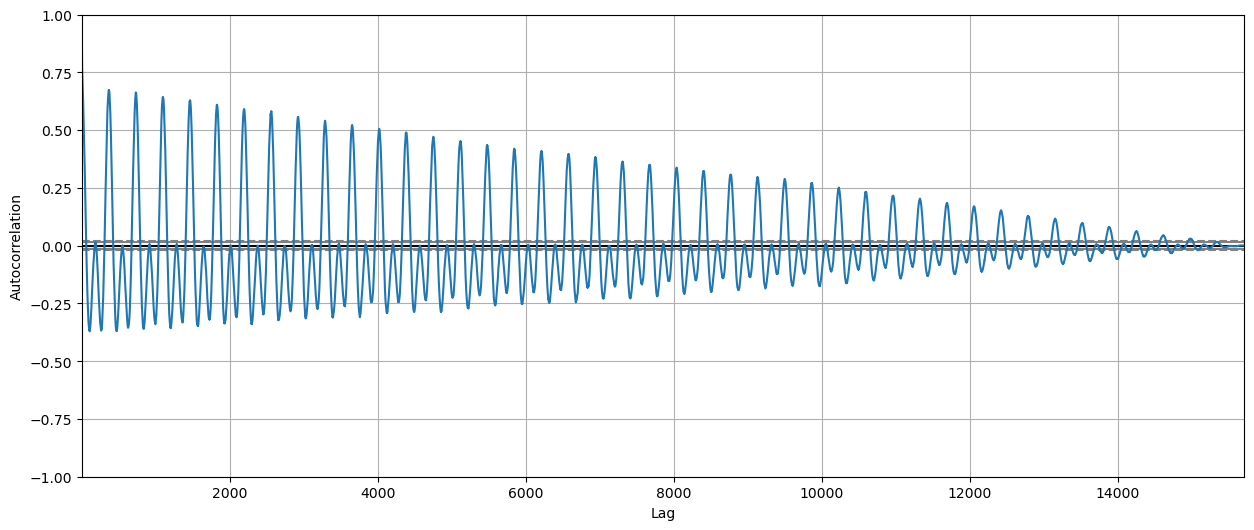

In [367]:
#Plot serial correlation for station UV000005502 over time

fig, ax = plt.subplots(figsize=(15,6))

autocorrelation_plot(df_main['UV000005502'])

Like in the above, When the autocorrelation plot converges towards 0 as the lag increases, it indicates that the time series data becomes less correlated with its own past values as the time lag grows.

A time series converging towards zero autocorrelation can be an indicator of stationarity, meaning its statistical properties like mean, variance, and autocorrelation are constant over time. 

### Forcast and predict future dates

In [332]:
# Forecast for next 20 year. i.e prediction for the next 7300+ days  after dec 31th, 2022

forecast = model_fitted.forecast(df_main.values[-model_fitted.k_ar:], steps=7305)

#Round to 2 decimal place
forecast = np.round(forecast, 2)

In [333]:
#Creating date time index for the new forcast data frame

# Define the start date and number of periods (days) 
start_date = '2023-01-01'  
num_days = 7305  

# Create a date range
date_range = pd.date_range(start=start_date, periods=num_days, freq='D')

forecast_df = pd.DataFrame(forecast, index=date_range, columns=df_main.columns)

In [334]:
forecast_df

STATION     UV000005502  UV000005507  UV000005522  UV000065501  UV000065516  \
2023-01-01        24.28        23.75        24.96        28.79        24.07   
2023-01-02        24.27        23.99        25.34        27.55        24.48   
2023-01-03        24.59        24.49        25.36        27.12        24.68   
2023-01-04        24.80        24.60        25.36        26.81        24.85   
2023-01-05        24.90        24.79        25.47        26.24        25.10   
...                 ...          ...          ...          ...          ...   
2042-12-27        29.21        28.55        27.65        29.58        28.51   
2042-12-28        29.21        28.55        27.65        29.58        28.51   
2042-12-29        29.21        28.55        27.65        29.58        28.51   
2042-12-30        29.21        28.55        27.65        29.58        28.51   
2042-12-31        29.21        28.55        27.65        29.58        28.51   

STATION     UVM00065503  UVM00065510  UVM00065518  IV000005557  IV000005562  \
2023-01-01        24.19        24.84        24.74        26.32        25.69   
2023-01-02        24.62        25.45        25.10        26.22        26.25   
2023-01-03        24.71        25.64        25.40        26.18        26.25   
2023-01-04        24.87        25.64        25.51        26.27        26.31   
2023-01-05        24.98        25.80        25.66        26.28        26.55   
...                 ...          ...          ...          ...          ...   
2042-12-27        28.80        27.79        28.02        26.25        27.54   
2042-12-28        28.80        27.79        28.02        26.25        27.54   
2042-12-29        28.80        27.79        28.02        26.25        27.54   
2042-12-30        28.80        27.79        28.02        26.25        27.54   
2042-12-31        28.80        27.79        28.02        26.25        27.54   

STATION     ...  SGM00061679  SGM00061695  SGM00061697  SGM00061698  \
2023-01-01  ...        26.71        24.80        24.45        25.04   
2023-01-02  ...        26.54        24.84        24.28        25.21   
2023-01-03  ...        26.88        24.95        24.47        25.15   
2023-01-04  ...        26.85        25.11        24.61        25.44   
2023-01-05  ...        26.87        25.15        24.57        25.41   
...         ...          ...          ...          ...          ...   
2042-12-27  ...        28.80        27.08        26.23        28.95   
2042-12-28  ...        28.80        27.08        26.23        28.95   
2042-12-29  ...        28.80        27.08        26.23        28.95   
2042-12-30  ...        28.80        27.08        26.23        28.95   
2042-12-31  ...        28.80        27.08        26.23        28.95   

STATION     SGM00061699  SL000061856  LIM00065660  GHM00065472  CVM00008594  \
2023-01-01        26.79        27.12        28.33        28.36        22.42   
2023-01-02        26.78        27.17        28.09        28.44        22.32   
2023-01-03        26.80        27.25        28.23        28.57        22.22   
2023-01-04        27.08        27.21        28.10        28.47        22.23   
2023-01-05        27.13        27.21        27.99        28.47        22.24   
...                 ...          ...          ...          ...          ...   
2042-12-27        29.48        27.17        27.30        27.47        23.76   
2042-12-28        29.48        27.17        27.30        27.47        23.76   
2042-12-29        29.48        27.17        27.30        27.47        23.76   
2042-12-30        29.48        27.17        27.30        27.47        23.76   
2042-12-31        29.48        27.17        27.30        27.47        23.76   

STATION     GV000001832  
2023-01-01        28.09  
2023-01-02        28.05  
2023-01-03        28.07  
2023-01-04        28.06  
2023-01-05        28.01  
...                 ...  
2042-12-27        27.23  
2042-12-28        27.23  
2042-12-29        27.23  
2042-12-30        27.23  
2042-12-31    

### Let's Compare the Main Data to the predicted data

In [335]:
#get the data time index for the main data frame so that we can compare the previous years to the focasted years

df_main_date_range = pd.date_range(start='1980-01-01', periods= 15706, freq='D')

df_main_date_range

DatetimeIndex(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04',
               '1980-01-05', '1980-01-06', '1980-01-07', '1980-01-08',
               '1980-01-09', '1980-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=15706, freq='D')

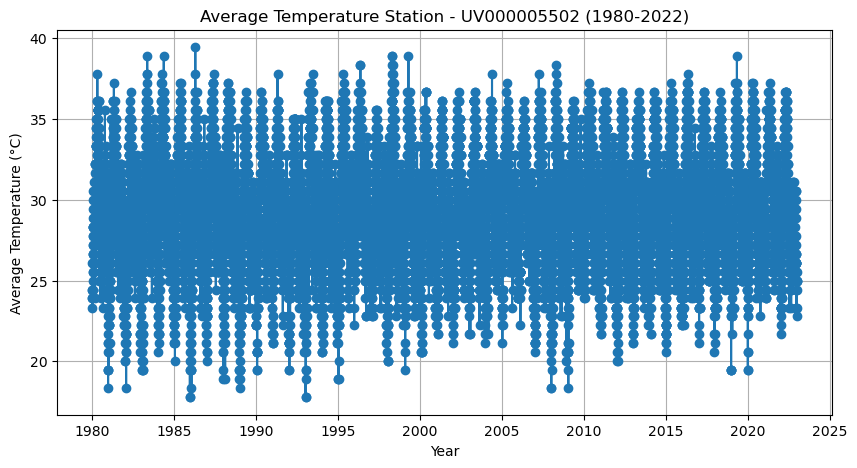

In [343]:
#Plot for station UV000005502 from 1980 to 2022

plt.figure(figsize=(10, 5)) 
plt.plot(df_main_date_range, df_main.UV000005502, marker='o')
plt.title('Average Temperature Station - UV000005502 (1980-2022)')  
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')  
plt.grid(True)
plt.show()

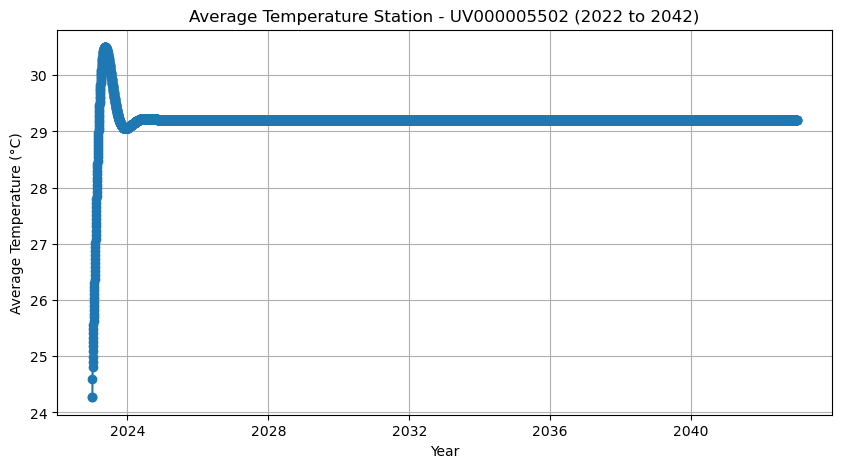

In [342]:
#Plot for forcasted temp for station UV000005502 from 2022 to 2024

plt.figure(figsize=(10, 5)) 
plt.plot(forecast_df.index, forecast_df.UV000005502, marker='o')  
plt.title('Average Temperature Station - UV000005502 (2022 to 2042)')  
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')  
plt.grid(True)
plt.show()

### From the plots above, it's evident that the temperatures from 1980 to 2022 primarily ranged between 28 to 35 degrees, with numerous outliers fluctuating above and below this range. The forecasted temperature (from 2023 to 2042) shows no (or little) outliers and is centered around 29 degrees. Notably, it predicted an extreme temperature for 2023, which aligns with what occurred this year. The year began with relatively cold temperatures, but around mid-2023, there was a surge in extreme temperatures globally. This spike in temperatures sparked widespread debate about climate change and its future impacts. Although West Africa also experienced these extreme temperatures, they were not as severe as those in most European and American countries. As 2023 came to a close, temperatures decreased and stabilized entering 2024. Assuming all factors remain constant and favorable, with low carbon emissions, West Africa should not experience extreme temperatures (considering this station - UV000005502), potentially averting the severity of climate change. However, this is only achievable if we undertake all necessary measures to maintain the carbon footprint as low as possible.

# Checking the Performance of VAR Model Used Above

In [344]:
# import data

import pandas as pd
import numpy 
import statsmodels
import matplotlib.pyplot as plt


df = pd.read_csv('West_Africa_temperature_1980_2022.csv')

#Transpose the data
df = df.T

# Set the second row as the header
new_header = df.iloc[0]  # Grab the first row for the header

df = df[1:]  # Take the data less the header row

df.columns = new_header  #Set the header row as the df header

df_main = df[4:]

#The temperatures in the dataframe are all abjects.
#Lets convert the objects to float
df_main = df_main.astype(float)

#Convert index to datatime

df_main.index = pd.to_datetime(df_main.index, errors='coerce')

### Split the data into train and test

In [345]:
train_ratio = 0.8
split_index = int(len(df_main) * train_ratio)
train = df_main[:split_index]
test = df_main[split_index:]

### Initialize and fit the VAR model

In [346]:
from statsmodels.tsa.api import VAR

model = VAR(train)
results = model.fit(maxlags=4, ic='aic')
# maxlags is the maximum lag order, ic='aic' tells the model to use Akaike Information Criterion to select the best lag value

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Make prediction

In [347]:
predictions = results.forecast(train.values[-results.k_ar:], steps=len(test))

In [348]:
#Convert prediction to a dataframe

pred_df = pd.DataFrame(predictions, index=test.index, columns=test.columns)

In [349]:
pred_df.head()

STATION     UV000005502  UV000005507  UV000005522  UV000065501  UV000065516  \
2014-05-26    31.731527    29.883788    28.327494    32.616965    30.139896   
2014-05-27    33.091115    30.857352    28.878145    34.480544    30.963134   
2014-05-28    33.260045    30.867647    28.732124    34.642013    30.850014   
2014-05-29    33.039837    30.694143    28.486084    34.454695    30.870178   
2014-05-30    33.116031    30.871830    28.629986    34.523976    30.940639   

STATION     UVM00065503  UVM00065510  UVM00065518  IV000005557  IV000005562  \
2014-05-26    30.807145    29.261668    30.043050    26.923734    28.364358   
2014-05-27    32.107618    29.838706    30.487165    26.965717    27.881670   
2014-05-28    32.055806    29.493107    30.280754    27.106777    27.986913   
2014-05-29    31.577454    29.311420    30.042435    26.960080    28.104253   
2014-05-30    31.757012    29.245702    30.033092    26.935293    28.080711   

STATION     ...  SGM00061679  SGM00061695  SGM00061697  SGM00061698  \
2014-05-26  ...    30.180399    27.984794    25.263010    31.418281   
2014-05-27  ...    29.645504    27.534573    25.234681    30.901097   
2014-05-28  ...    29.488717    27.975913    25.309921    31.007351   
2014-05-29  ...    29.663404    28.123871    25.506873    31.217753   
2014-05-30  ...    29.812440    28.240910    25.725906    31.357104   

STATION     SGM00061699  SL000061856  LIM00065660  GHM00065472  CVM00008594  \
2014-05-26    31.622774    27.480532    27.645150    28.082508    23.349293   
2014-05-27    30.879395    27.678423    27.617167    27.842467    23.259552   
2014-05-28    31.008769    27.987301    27.550232    27.871235    23.440326   
2014-05-29    31.131254    27.931188    27.645591    27.779758    23.462383   
2014-05-30    31.260627    27.916198    27.621556    27.670068    23.520144   

STATION     GV000001832  
2014-05-26    28.047105  
2014-05-27    28.228056  
2014-05-28    28.296795  
2014-05-29    28.331342  
2014-05-30    28.253555  

[5 rows x 72 columns]

### Checking for the perfomance for each station

In [350]:
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define a function for RMSE
def rmse(test, pred_df):
    return np.sqrt(mean_squared_error(test, pred_df))

# Calculate and print error metrics for each time series
for column in test.columns:
    print(f'Error metrics for {column}:')
    mae = mean_absolute_error(test[column], pred_df[column])
    mse = mean_squared_error(test[column], pred_df[column])
    _rmse = rmse(test[column], pred_df[column])
    
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {_rmse}\n')

Error metrics for UV000005502:
MAE: 2.8137195774507058
MSE: 11.801577170477996
RMSE: 3.4353423658316786

Error metrics for UV000005507:
MAE: 2.4322438081755835
MSE: 9.104068600750919
RMSE: 3.0172949144475285

Error metrics for UV000005522:
MAE: 1.9462635116689644
MSE: 5.932006100267156
RMSE: 2.4355710008675904

Error metrics for UV000065501:
MAE: 3.1226263929261515
MSE: 14.265654302899755
RMSE: 3.7769901115702904

Error metrics for UV000065516:
MAE: 2.3950981160000233
MSE: 8.797375916943189
RMSE: 2.9660370727526635

Error metrics for UVM00065503:
MAE: 2.524986384992721
MSE: 9.69633904545291
RMSE: 3.113894514182025

Error metrics for UVM00065510:
MAE: 2.0763376295510767
MSE: 6.470514753540052
RMSE: 2.543720651632182

Error metrics for UVM00065518:
MAE: 2.276313385948352
MSE: 8.089403491937176
RMSE: 2.844187668199336

Error metrics for IV000005557:
MAE: 1.225791132321324
MSE: 2.4432445735545483
RMSE: 1.5630881528418505

Error metrics for IV000005562:
MAE: 1.357725368126905
MSE: 2.9455847

### Explanation

A lower MAE indicates better accuracy. For example, for station IV000005557, the MAE is 1.2258, meaning that, on average, the model's predictions were off by about 1.2258 degrees.

This is similar to MAE but squares the differences before averaging them. This squaring gives more weight to larger errors. It's useful when you are more concerned about large errors. For instance, for station NG000001080, the MSE is 18.1342, indicating that when errors are squared, the average squared error is about 18.1342. Higher values indicate poorer model performance, especially in terms of larger errors.

This is the square root of the MSE. It brings the error metric back to the same scale as the data, making it more interpretable. RMSE is a good measure of the accuracy of the model and, like MSE, gives higher weight to larger errors. A lower RMSE value indicates better fit. For example, station NG000061017 has an RMSE of 7.0118, meaning the standard deviation of the prediction errors is about 7.0118 degrees.

# So in conclusion, the model is good and from the test done above, we can see that most of the station are only off by around 1 to 4 degrees. 

.

.

# Using ARIMA Modelling

In [351]:
# Import potential libraries to use

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.stattools import adfuller
from numpy import log

%matplotlib inline



In [352]:
df_main.head()

STATION     UV000005502  UV000005507  UV000005522  UV000065501  UV000065516  \
1980-01-01        23.89        24.44        26.67        21.67        24.44   
1980-01-02        24.44        24.44        27.22        24.44        26.11   
1980-01-03        24.44        25.00        26.11        22.78        25.00   
1980-01-04        23.33        25.00        26.11        23.33        24.44   
1980-01-05        23.89        25.56        27.22        23.89        25.56   

STATION     UVM00065503  UVM00065510  UVM00065518  IV000005557  IV000005562  \
1980-01-01        23.33        24.44        26.67        25.56        24.44   
1980-01-02        25.00        26.11        26.67        25.56        27.22   
1980-01-03        25.56        25.00        26.67        26.11        27.22   
1980-01-04        24.44        25.00        26.67        26.67        26.67   
1980-01-05        25.56        26.67        26.67        26.11        26.67   

STATION     ...  SGM00061679  SGM00061695  SGM00061697  SGM00061698  \
1980-01-01  ...        26.67        23.33        26.67        28.89   
1980-01-02  ...        26.67        24.44        26.67        27.78   
1980-01-03  ...        26.67        23.33        26.67        28.89   
1980-01-04  ...        26.67        21.67        26.67        23.33   
1980-01-05  ...        24.44        24.44        26.67        23.33   

STATION     SGM00061699  SL000061856  LIM00065660  GHM00065472  CVM00008594  \
1980-01-01        30.00        26.67        27.78        26.11        21.67   
1980-01-02        26.11        26.67        27.78        28.89        22.22   
1980-01-03        27.78        26.67        27.78        28.89        21.11   
1980-01-04        28.33        26.67        27.78        28.89        21.67   
1980-01-05        27.22        26.67        27.78        28.89        21.67   

STATION     GV000001832  
1980-01-01        26.11  
1980-01-02        26.11  
1980-01-03        26.11  
1980-01-04        26.11  
1980-01-05        26.11  

[5 rows x 72 columns]

In [353]:
y = df_main['UV000005502']
y.head()

1980-01-01    23.89
1980-01-02    24.44
1980-01-03    24.44
1980-01-04    23.33
1980-01-05    23.89
Name: UV000005502, dtype: float64

In [354]:
df_main.head()

STATION     UV000005502  UV000005507  UV000005522  UV000065501  UV000065516  \
1980-01-01        23.89        24.44        26.67        21.67        24.44   
1980-01-02        24.44        24.44        27.22        24.44        26.11   
1980-01-03        24.44        25.00        26.11        22.78        25.00   
1980-01-04        23.33        25.00        26.11        23.33        24.44   
1980-01-05        23.89        25.56        27.22        23.89        25.56   

STATION     UVM00065503  UVM00065510  UVM00065518  IV000005557  IV000005562  \
1980-01-01        23.33        24.44        26.67        25.56        24.44   
1980-01-02        25.00        26.11        26.67        25.56        27.22   
1980-01-03        25.56        25.00        26.67        26.11        27.22   
1980-01-04        24.44        25.00        26.67        26.67        26.67   
1980-01-05        25.56        26.67        26.67        26.11        26.67   

STATION     ...  SGM00061679  SGM00061695  SGM00061697  SGM00061698  \
1980-01-01  ...        26.67        23.33        26.67        28.89   
1980-01-02  ...        26.67        24.44        26.67        27.78   
1980-01-03  ...        26.67        23.33        26.67        28.89   
1980-01-04  ...        26.67        21.67        26.67        23.33   
1980-01-05  ...        24.44        24.44        26.67        23.33   

STATION     SGM00061699  SL000061856  LIM00065660  GHM00065472  CVM00008594  \
1980-01-01        30.00        26.67        27.78        26.11        21.67   
1980-01-02        26.11        26.67        27.78        28.89        22.22   
1980-01-03        27.78        26.67        27.78        28.89        21.11   
1980-01-04        28.33        26.67        27.78        28.89        21.67   
1980-01-05        27.22        26.67        27.78        28.89        21.67   

STATION     GV000001832  
1980-01-01        26.11  
1980-01-02        26.11  
1980-01-03        26.11  
1980-01-04        26.11  
1980-01-05        26.11  

[5 rows x 72 columns]

<Axes: >

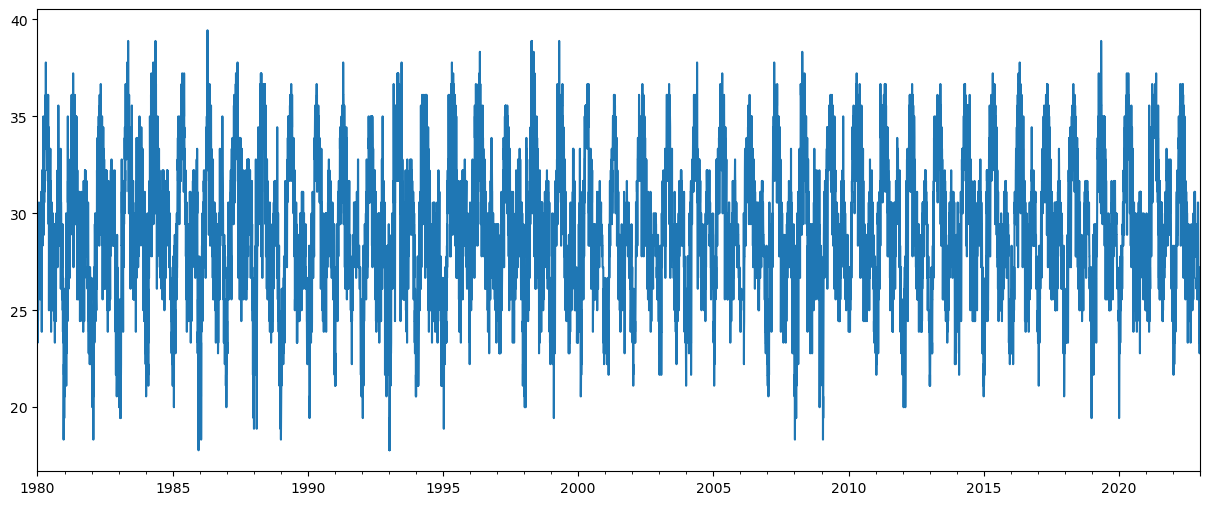

In [358]:
#Plot y over time

fig, ax = plt.subplots(figsize=(15,6))

y.plot(ax=ax)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

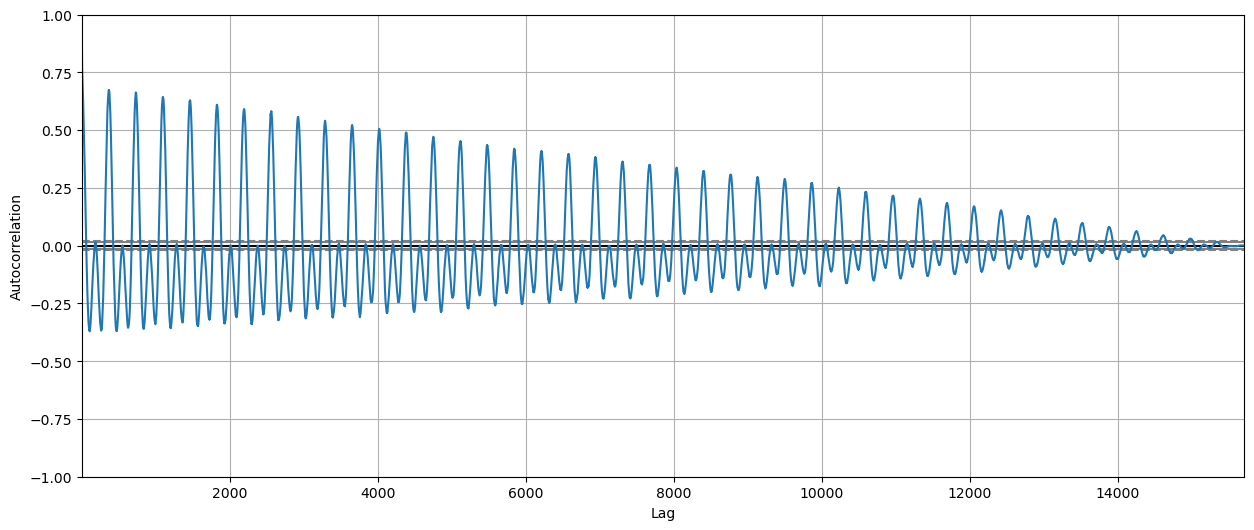

In [356]:
#Plot autocorrection for y over time
#Autocorrelation, also known as serial correlation, is a measure of the correlation of a signal with a 
#delayed copy of itself as a function of delay.

fig, ax = plt.subplots(figsize=(15,6))

autocorrelation_plot(y)

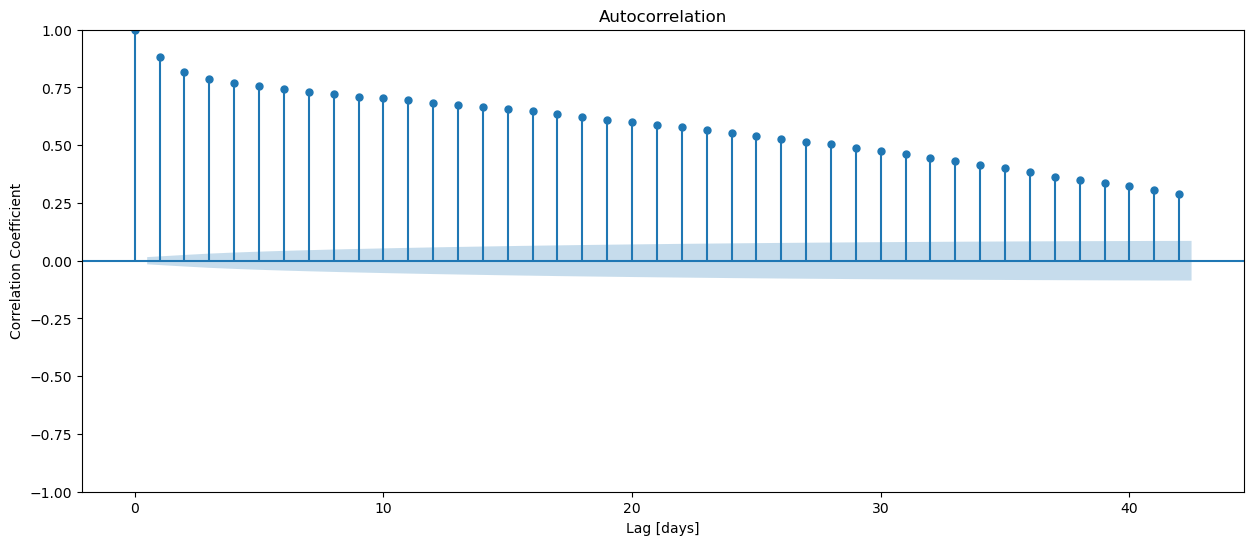

In [357]:
# ACF Plot - Autocorrelation Function (ACF) plot

fig, ax = plt.subplots(figsize=(15,6))
plot_acf(y, ax=ax)
plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient");

In [359]:
#Using this simple test to check if stationery

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -14.608482
p-value: 0.000000


Since p-value(0.00) is less than the significance level (p_value = 0.05) then we reject the null hypothesis and infer that the time series is indeed stationary. The null hypothesis (Ho) of the ADF test is that the time series is non-stationary.

So, if the p-value of the test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary.

If P Value > 0.05 we go ahead with finding the order of differencing.

#### Train Test Split

Splitting the data with 90% training set

In [360]:
cutoff_test = int(len(y) * 0.95)

y_train = y.iloc[:cutoff_test]
y_test = y.iloc[cutoff_test:]

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Total dataset", len(y_train + y_test))

y_train shape: (14920,)
y_test shape: (786,)
Total dataset 15706


#### Baseline Model

In [361]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean Temperatrure Reading:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Temperatrure Reading: 29.2
Baseline MAE: 2.88


#### Iterate

Create ranges for possible  𝑝 and  𝑞 values. p_params should range between 0 and 25, by steps of 8. q_params should range between 0 and 3 by steps of 1.

In [363]:
p_params = range(0, 25, 8)
q_params = range(0, 3, 1)

Train a model with every combination of hyperparameters in p_params and q_params. Every time the model is trained, the mean absolute error is calculated and then saved to a dictionary.

In [366]:
# Create dictionary to store MAEs
mae_grid = {}
# Outer loop: Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = []
    # Inner loop: Iterate through possible values for `q`
    for q in q_params:
        # Combination of hyperparameters for model
        order = (p, 0, q)
        # Note start time
        start_time = time.time()
        # Train model
        model = ARIMA(y_train, order=order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        y_pred = model.predict()
        # Calculate training MAE
        mae = mean_absolute_error(y_train, y_pred)
        print(mae)
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)

print()
print(mae_grid)

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Trained ARIMA (0, 0, 0) in 3.87 seconds.
2.883805634188907


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Trained ARIMA (0, 0, 1) in 2.17 seconds.
1.9885361817475458


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Trained ARIMA (0, 0, 2) in 4.8 seconds.
1.6764588001085037


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Trained ARIMA (8, 0, 0) in 5.25 seconds.
1.1908441280023934


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Trained ARIMA (8, 0, 1) in 48.81 seconds.
1.1888706065017685


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Trained ARIMA (8, 0, 2) in 28.06 seconds.
1.1888315170525452


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Trained ARIMA (16, 0, 0) in 15.62 seconds.
1.1884394355740961


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trained ARIMA (16, 0, 1) in 163.45 seconds.
1.18826780921672


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Trained ARIMA (16, 0, 2) in 95.44 seconds.
1.1884793631630015


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Trained ARIMA (24, 0, 0) in 49.64 seconds.
1.1877789951288644


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trained ARIMA (24, 0, 1) in 356.07 seconds.
1.1885442703884601


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trained ARIMA (24, 0, 2) in 396.99 seconds.
1.1842722940526196

{0: [2.883805634188907, 1.9885361817475458, 1.6764588001085037], 8: [1.1908441280023934, 1.1888706065017685, 1.1888315170525452], 16: [1.1884394355740961, 1.18826780921672, 1.1884793631630015], 24: [1.1877789951288644, 1.1885442703884601, 1.1842722940526196]}


In [371]:
#finding the mean absolute error

mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

0       8       16      24
0  2.8838  1.1908  1.1884  1.1878
1  1.9885  1.1889  1.1883  1.1885
2  1.6765  1.1888  1.1885  1.1843

Text(0.5, 1.0, 'ARMA Grid Search (Criterion: MAE)')

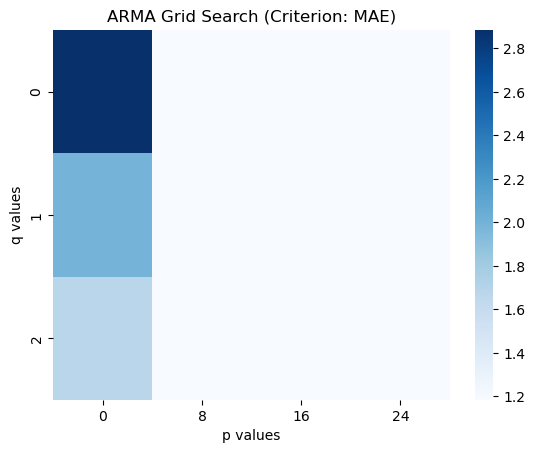

In [372]:
#this code is creating a heatmap to visually represent the results of an ARMA model parameter tuning exercise, 
#using Mean Absolute Error as the criterion for comparison. The heatmap will 
#help in identifying which combinations of "p" and "q" values yield the lowest MAE, and therefore the best model performance.

sns.heatmap(mae_df, cmap = "Blues")
plt.xlabel("p values")
plt.ylabel("q values")
plt.title("ARMA Grid Search (Criterion: MAE)")

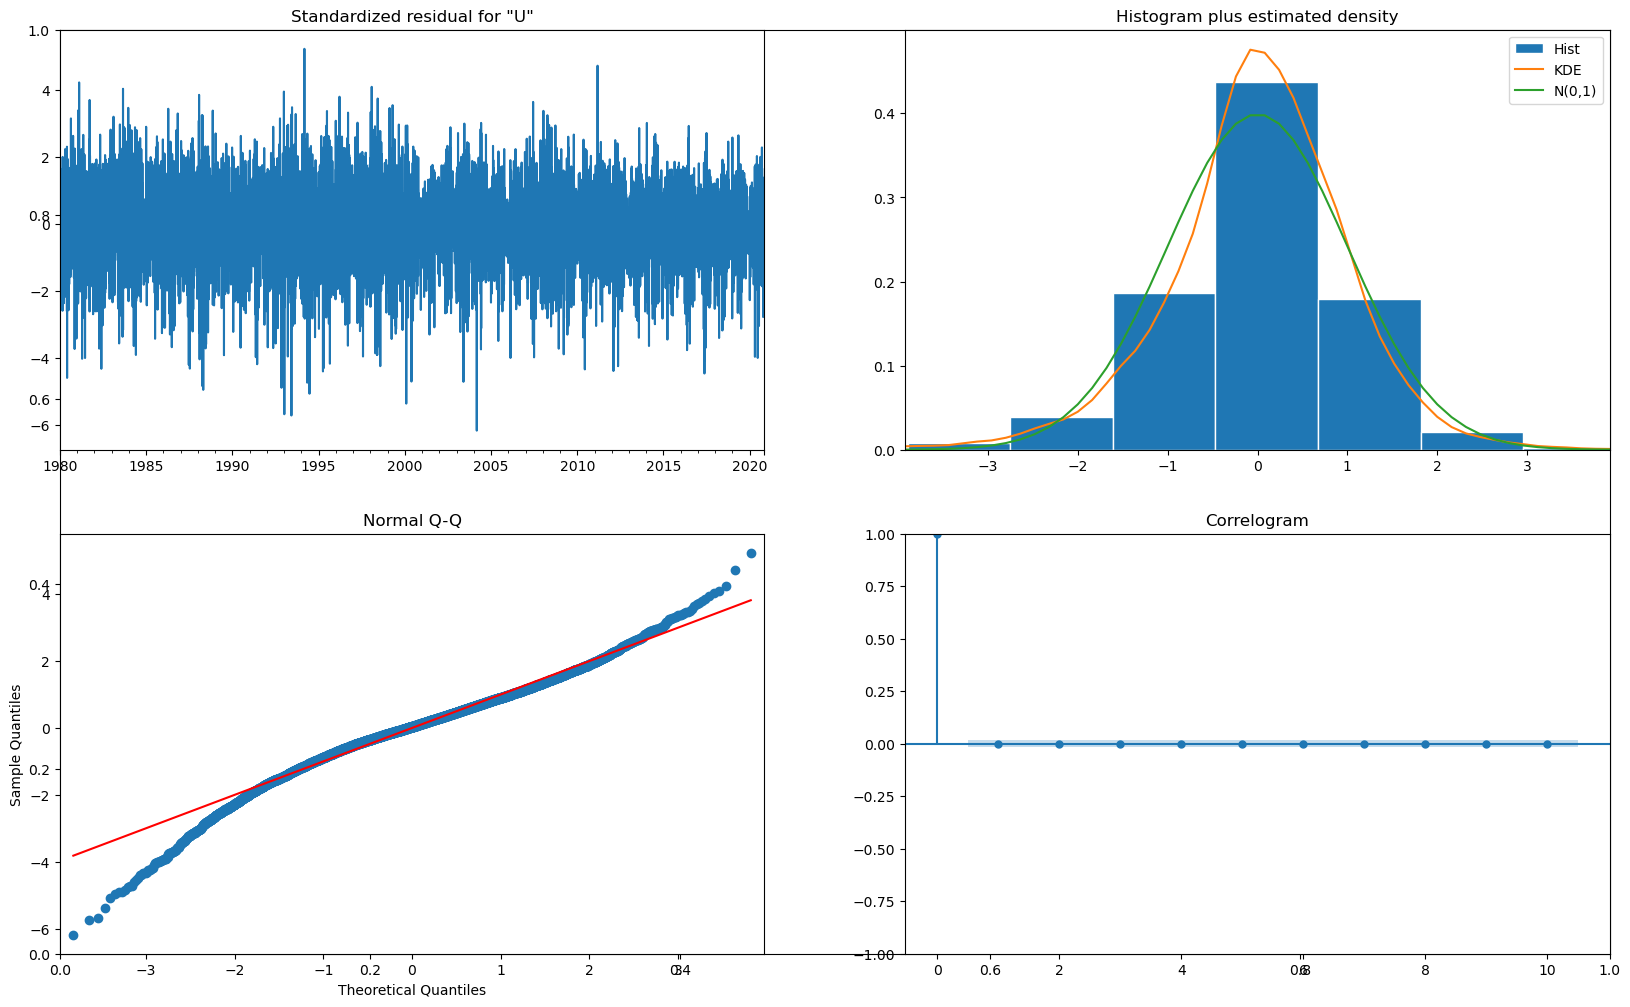

In [373]:
fig, ax = plt.subplots(figsize=(20, 12))
model.plot_diagnostics(fig=fig);

In [374]:
model = ARIMA(y_train, order= (24,0,2)).fit()

y_pred = model.predict()

# Calculate training MAE
mae = mean_absolute_error(y_train, y_pred)
print(round(mae, 2))

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1.18


In [375]:
model.forecast(2022-12-31)

2020-11-06    29.823560
2020-11-07    29.722532
2020-11-08    29.684550
2020-11-09    29.658245
2020-11-10    29.682486
                ...    
2026-04-03    29.173989
2026-04-04    29.173989
2026-04-05    29.173990
2026-04-06    29.173990
2026-04-07    29.173990
Freq: D, Name: predicted_mean, Length: 1979, dtype: float64

In [376]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:            UV000005502   No. Observations:                14920
Model:                ARIMA(24, 0, 2)   Log Likelihood              -27998.228
Date:                Wed, 13 Dec 2023   AIC                          56052.456
Time:                        10:58:13   BIC                          56265.549
Sample:                    01-01-1980   HQIC                         56123.176
                         - 11-05-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.1739      0.062    467.337      0.000      29.052      29.296
ar.L1          0.6184      0.022     28.613      0.000       0.576       0.661
ar.L2          1.0004      0.034     29.842      0.0

In [377]:
model_test = ARIMA(y_test, order= (24,0,2)).fit()

y_pred_test = model_test.predict()

# Calculate training MAE
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(round(mae_test, 2))
print(round(rmse_test, 2))

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1.04
1.41


                               SARIMAX Results                                
Dep. Variable:            UV000005502   No. Observations:                  786
Model:                ARIMA(24, 0, 2)   Log Likelihood               -1383.258
Date:                Wed, 13 Dec 2023   AIC                           2822.516
Time:                        10:58:26   BIC                           2953.191
Sample:                    11-06-2020   HQIC                          2872.757
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.4473      1.003     28.364      0.000      26.482      30.413
ar.L1          0.8507      0.342      2.486      0.013       0.180       1.521
ar.L2          0.3916      0.361      1.084      0.2

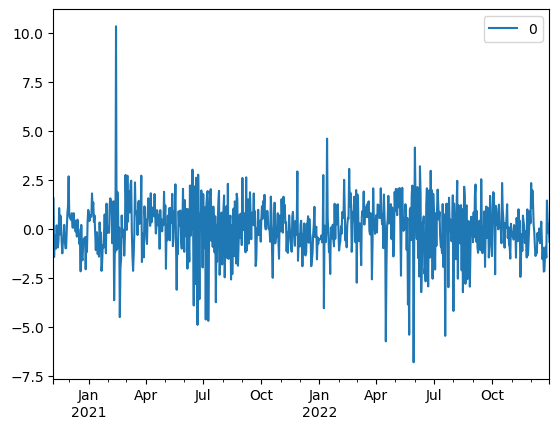

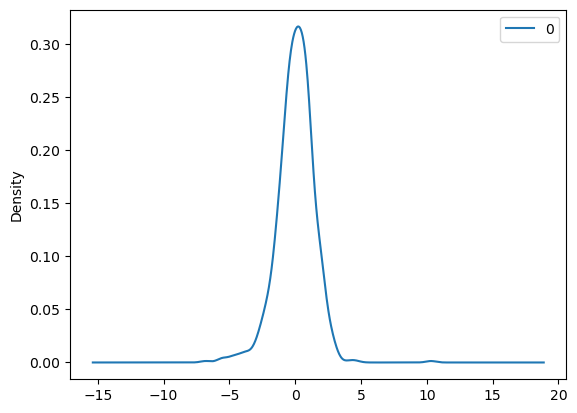

In [378]:
print(model_test.summary())
# line plot of residuals
residuals = pd.DataFrame(model_test.resid)
residuals.plot()

# density plot of residuals
residuals.plot(kind='kde')

# summary stats of residuals
print(residuals.describe())

In [379]:
df_pred_test = pd.DataFrame(
    {"y_test": y_test, "y_pred": y_pred_test}, index=y_test.index
)


In [380]:
#This is the relationship between the predicted value and the actual value 

df_pred_test = pd.DataFrame(
    {"y_test": y_test, "y_pred": y_pred_test}, index=y_test.index
)

fig = px.line(df_pred_test, labels={"value": "Air Temp."})
fig.show()

.

.

# Using Facebook Prophet Model

In [390]:
df = df_main

df.head()

STATION     UV000005502  UV000005507  UV000005522  UV000065501  UV000065516  \
1980-01-01        23.89        24.44        26.67        21.67        24.44   
1980-01-02        24.44        24.44        27.22        24.44        26.11   
1980-01-03        24.44        25.00        26.11        22.78        25.00   
1980-01-04        23.33        25.00        26.11        23.33        24.44   
1980-01-05        23.89        25.56        27.22        23.89        25.56   

STATION     UVM00065503  UVM00065510  UVM00065518  IV000005557  IV000005562  \
1980-01-01        23.33        24.44        26.67        25.56        24.44   
1980-01-02        25.00        26.11        26.67        25.56        27.22   
1980-01-03        25.56        25.00        26.67        26.11        27.22   
1980-01-04        24.44        25.00        26.67        26.67        26.67   
1980-01-05        25.56        26.67        26.67        26.11        26.67   

STATION     ...  SGM00061679  SGM00061695  SGM00061697  SGM00061698  \
1980-01-01  ...        26.67        23.33        26.67        28.89   
1980-01-02  ...        26.67        24.44        26.67        27.78   
1980-01-03  ...        26.67        23.33        26.67        28.89   
1980-01-04  ...        26.67        21.67        26.67        23.33   
1980-01-05  ...        24.44        24.44        26.67        23.33   

STATION     SGM00061699  SL000061856  LIM00065660  GHM00065472  CVM00008594  \
1980-01-01        30.00        26.67        27.78        26.11        21.67   
1980-01-02        26.11        26.67        27.78        28.89        22.22   
1980-01-03        27.78        26.67        27.78        28.89        21.11   
1980-01-04        28.33        26.67        27.78        28.89        21.67   
1980-01-05        27.22        26.67        27.78        28.89        21.67   

STATION     GV000001832  
1980-01-01        26.11  
1980-01-02        26.11  
1980-01-03        26.11  
1980-01-04        26.11  
1980-01-05        26.11  

[5 rows x 72 columns]

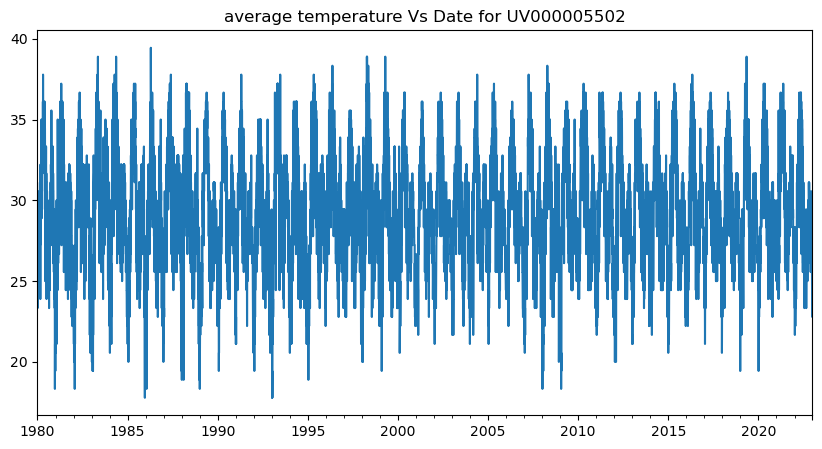

In [392]:
#average temperature against time

df['UV000005502'].plot(figsize=(10, 5))
plt.title("average temperature Vs Date for UV000005502")
plt.show()

In [393]:
predictors = df.columns[df.columns.isin(['UV000005502', 'UV000005507', 'UV000005522', 'UV000065501',
       'UV000065516', 'UVM00065503', 'UVM00065510', 'UVM00065518',
       'IV000005557', 'IV000005562', 'IV000005592', 'IV000065585',
       'IV000065599', 'IVM00065545', 'IVM00065560', 'IVM00065563',
       'IVM00065578', 'IVM00065594', 'NG000001036', 'NG000001049',
       'NG000001052', 'NG000001075', 'NG000001080', 'NG000001090',
       'NG000061017', 'NG000061024', 'NG000061043', 'NG000061096',
       'NGM00061045', 'NGM00061091', 'NGM00061099', 'UVM00065505',
       'TO000005361', 'TO000005376', 'TOM00065352', 'TOM00065355',
       'TOM00065387', 'GAM00061701', 'ML000061297', 'MLM00061230',
       'MLM00061257', 'MLM00061265', 'MLM00061272', 'MLM00061277',
       'MLM00061291', 'MLM00061293', 'MLM00061296', 'PUM00061766',
       'BN000005319', 'BN000005344', 'BN000065306', 'BN000065335',
       'BNM00065330', 'BNM00065338', 'NIM00065201', 'SG000001627',
       'SG000061612', 'SG000061641', 'SG000061687', 'SGM00061600',
       'SGM00061630', 'SGM00061666', 'SGM00061679', 'SGM00061695',
       'SGM00061697', 'SGM00061698', 'SGM00061699', 'SL000061856',
       'LIM00065660', 'GHM00065472', 'CVM00008594', 'GV000001832'])]


In [394]:
predictors

Index(['UV000005502', 'UV000005507', 'UV000005522', 'UV000065501',
       'UV000065516', 'UVM00065503', 'UVM00065510', 'UVM00065518',
       'IV000005557', 'IV000005562', 'IV000005592', 'IV000065585',
       'IV000065599', 'IVM00065545', 'IVM00065560', 'IVM00065563',
       'IVM00065578', 'IVM00065594', 'NG000001036', 'NG000001049',
       'NG000001052', 'NG000001075', 'NG000001080', 'NG000001090',
       'NG000061017', 'NG000061024', 'NG000061043', 'NG000061096',
       'NGM00061045', 'NGM00061091', 'NGM00061099', 'UVM00065505',
       'TO000005361', 'TO000005376', 'TOM00065352', 'TOM00065355',
       'TOM00065387', 'GAM00061701', 'ML000061297', 'MLM00061230',
       'MLM00061257', 'MLM00061265', 'MLM00061272', 'MLM00061277',
       'MLM00061291', 'MLM00061293', 'MLM00061296', 'PUM00061766',
       'BN000005319', 'BN000005344', 'BN000065306', 'BN000065335',
       'BNM00065330', 'BNM00065338', 'NIM00065201', 'SG000001627',
       'SG000061612', 'SG000061641', 'SG000061687', 'SGM000616

In [396]:
#Selecting station UV000005502 to be used for modelling

model_df = df[['UV000005502']]

In [399]:
#Ensuring that the indexes are in date time format

model_df.index = pd.to_datetime(model_df.index)

In [400]:
# split our data into test and train

train = model_df[:"2019-01-31"]
test = model_df["2020-01-31":]

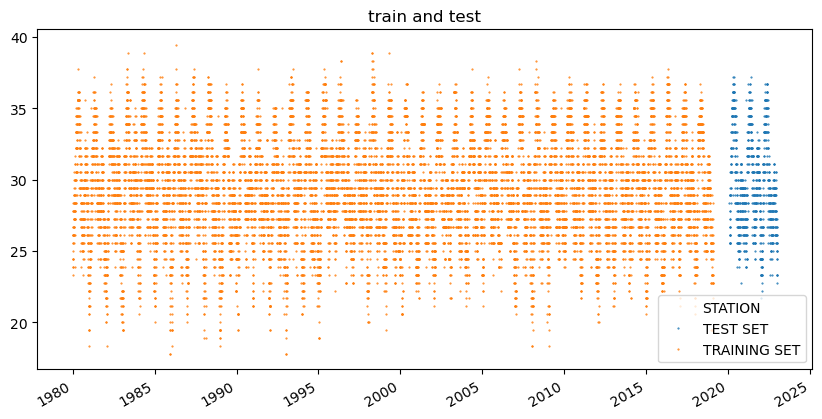

In [402]:
# Plot train and test so you can see where we have split

test.rename(columns={'UV000005502': 'TEST SET'}) \
    .join(train.rename(columns={'UV000005502': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(10, 5), title='train and test', style='.', ms=1)
plt.show()

Simple Prophet Model
Prophet model expects the dataset to be named a specific way. We will rename our dataframe columns before feeding it into the model.
Datetime column named: ds
target : y

In [416]:
# Format data for prophet model using ds and y
train_prophet = model_df.reset_index() \
    .rename(columns={'index':'ds',
                     'UV000005502':'y'})

In [417]:
train_prophet

STATION         ds      y
0       1980-01-01  23.89
1       1980-01-02  24.44
2       1980-01-03  24.44
3       1980-01-04  23.33
4       1980-01-05  23.89
...            ...    ...
15701   2022-12-27  25.00
15702   2022-12-28  25.56
15703   2022-12-29  25.00
15704   2022-12-30  25.00
15705   2022-12-31  24.44

[15706 rows x 2 columns]

In [418]:
# Fit initial prophet model
from prophet import Prophet


model = Prophet()
model.fit(train_prophet)

14:24:22 - cmdstanpy - INFO - Chain [1] start processing
14:24:31 - cmdstanpy - INFO - Chain [1] done processing


In [420]:
# Predict on test set with model
test_prophet = test.reset_index() \
    .rename(columns={'index':'ds',
                     'UV000005502':'y'})
test_forecast = model.predict(test_prophet)

In [422]:
test_forecast.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2020-01-31  29.406332   23.563619   28.661201    29.406332    29.406332   
1 2020-02-01  29.406377   23.638811   28.716734    29.406377    29.406377   
2 2020-02-02  29.406423   23.851444   28.725507    29.406423    29.406423   
3 2020-02-03  29.406468   23.948036   28.901850    29.406468    29.406468   
4 2020-02-04  29.406514   23.979345   29.006379    29.406514    29.406514   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -3.342574             -3.342574             -3.342574 -0.032089   
1       -3.250768             -3.250768             -3.250768 -0.038158   
2       -3.105085             -3.105085             -3.105085  0.008342   
3       -2.978335             -2.978335             -2.978335  0.034231   
4       -2.853036             -2.853036             -2.853036  0.056610   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0     -0.032089     -0.032089 -3.310485     -3.310485     -3.310485   
1     -0.038158     -0.038158 -3.212610     -3.212610     -3.212610   
2      0.008342      0.008342 -3.113427     -3.113427     -3.113427   
3      0.034231      0.034231 -3.012565     -3.012565     -3.012565   
4      0.056610      0.056610 -2.909646     -2.909646     -2.909646   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  26.063757  
1                         0.0  26.155609  
2                         0.0  26.301338  
3                         0.0  26.428134  
4                         0.0  26.553478

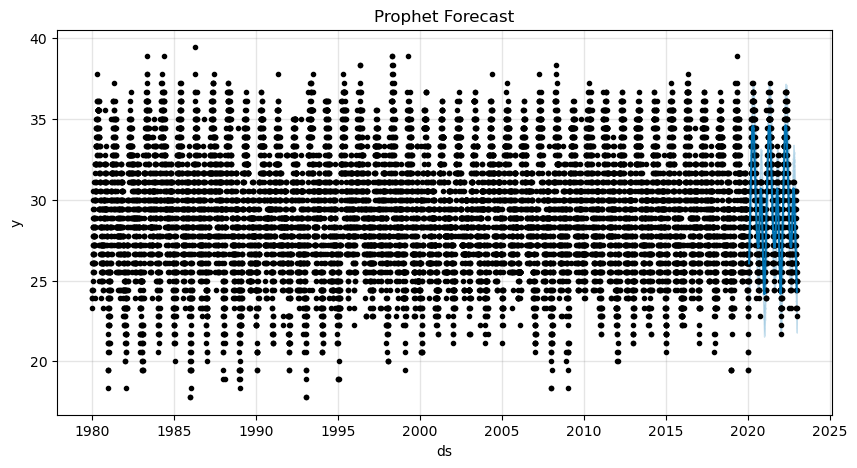

In [424]:
# plot the forecast

fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(test_forecast, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

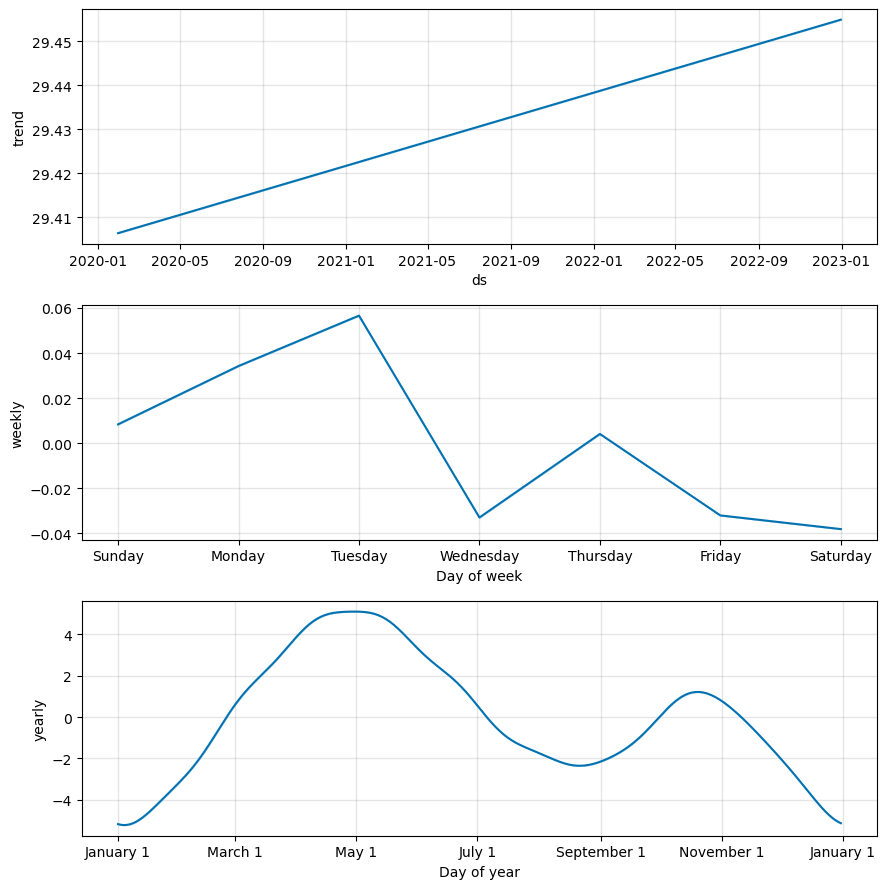

In [425]:
fig = model.plot_components(test_forecast)
plt.show()

# compare with the actual values

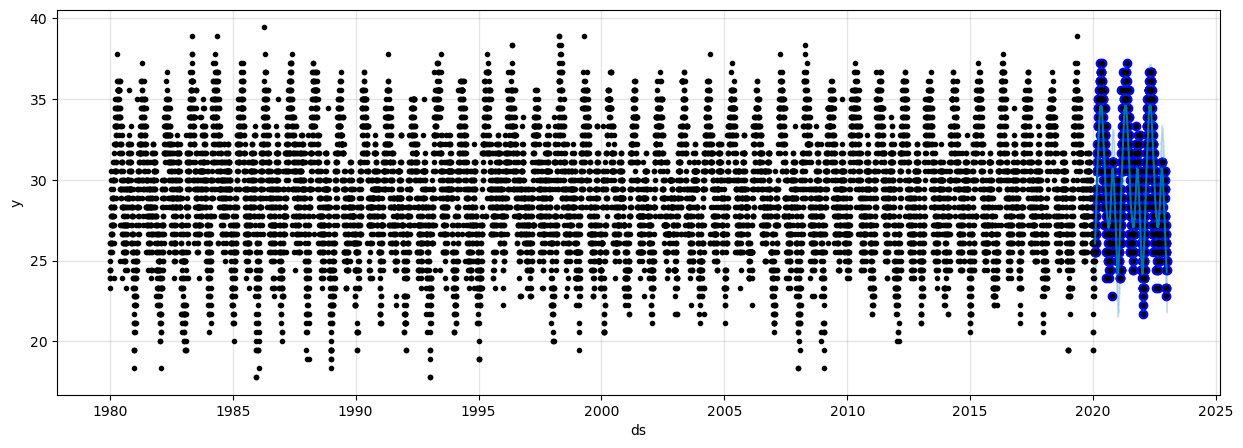

In [427]:
# Plot the forecast with the actuals
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test.index, test['UV000005502'], color='b')
fig = model.plot(test_forecast, ax=ax )

Here we can see in blue the forcasted value and in black the actual value. here we can say the model is picking on the trend pretty well in the historic data, it's not really over fitting, it's picked well, but we will confirm that on the error metrics in the next steps.

In [429]:
# okay, let's evalute our model
np.sqrt(mean_squared_error(y_true=test['UV000005502'],
                   y_pred=test_forecast['yhat']))

1.799221045907744

In [431]:
mean_absolute_error(y_true=test['UV000005502'],
                   y_pred=test_forecast['yhat'])

1.4264791405695054

# Station model

In [434]:
station_model_df = df[['UV000005502']]

In [435]:
station_model_df

STATION     UV000005502
1980-01-01        23.89
1980-01-02        24.44
1980-01-03        24.44
1980-01-04        23.33
1980-01-05        23.89
...                 ...
2022-12-27        25.00
2022-12-28        25.56
2022-12-29        25.00
2022-12-30        25.00
2022-12-31        24.44

[15706 rows x 1 columns]

In [436]:
station_model_df.index = pd.to_datetime(station_model_df.index)

In [438]:
# split our data
train = station_model_df[:"2019-01-31"]
test = station_model_df["2020-01-31":]

# Format data for prophet model using ds and y
station_train_prophet = station_model_df.reset_index() \
    .rename(columns={'index':'ds',
                     'UV000005502':'y'})

station_model = Prophet()
station_model.fit(station_train_prophet)

14:32:44 - cmdstanpy - INFO - Chain [1] start processing
14:32:53 - cmdstanpy - INFO - Chain [1] done processing


In [440]:
# Predict on test set with model
station_test_prophet = test.reset_index() \
    .rename(columns={'index':'ds',
                     'UV000005502':'y'})

station_test_forecast = model.predict(station_test_prophet)


In [441]:
station_test_forecast.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2020-01-31  29.406332   23.607363   28.675545    29.406332    29.406332   
1 2020-02-01  29.406377   23.557897   28.629502    29.406377    29.406377   
2 2020-02-02  29.406423   23.824625   28.754358    29.406423    29.406423   
3 2020-02-03  29.406468   24.001715   29.055363    29.406468    29.406468   
4 2020-02-04  29.406514   23.959054   28.981897    29.406514    29.406514   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -3.342574             -3.342574             -3.342574 -0.032089   
1       -3.250768             -3.250768             -3.250768 -0.038158   
2       -3.105085             -3.105085             -3.105085  0.008342   
3       -2.978335             -2.978335             -2.978335  0.034231   
4       -2.853036             -2.853036             -2.853036  0.056610   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0     -0.032089     -0.032089 -3.310485     -3.310485     -3.310485   
1     -0.038158     -0.038158 -3.212610     -3.212610     -3.212610   
2      0.008342      0.008342 -3.113427     -3.113427     -3.113427   
3      0.034231      0.034231 -3.012565     -3.012565     -3.012565   
4      0.056610      0.056610 -2.909646     -2.909646     -2.909646   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  26.063757  
1                         0.0  26.155609  
2                         0.0  26.301338  
3                         0.0  26.428134  
4                         0.0  26.553478

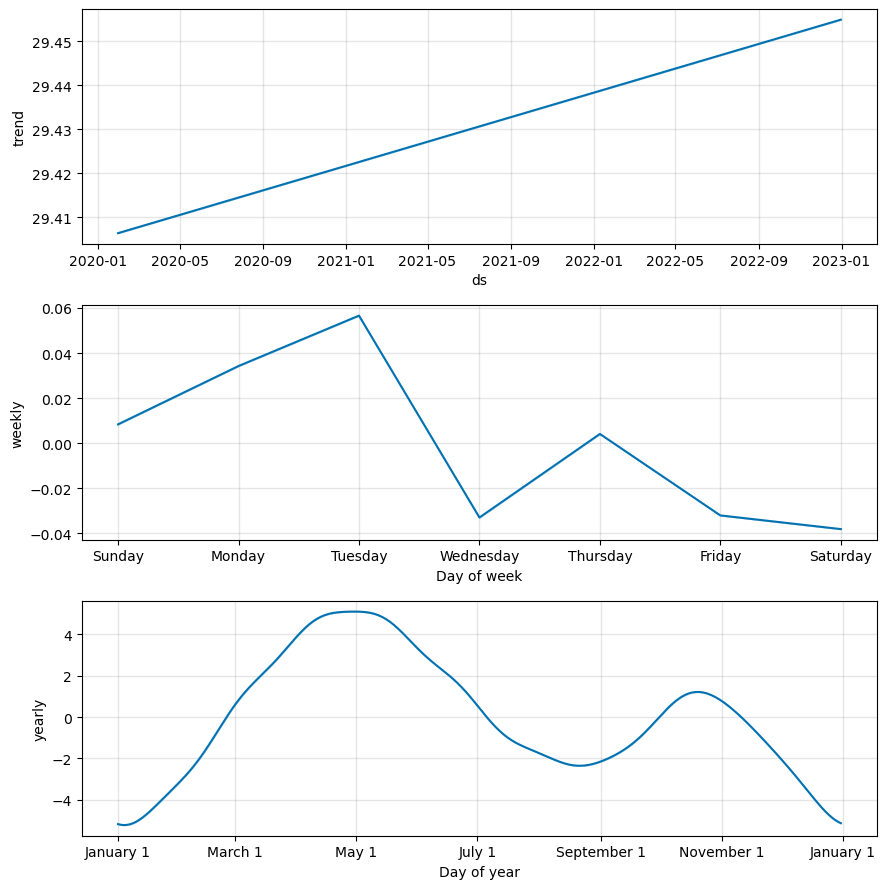

In [442]:
fig = model.plot_components(station_test_forecast)
plt.show()

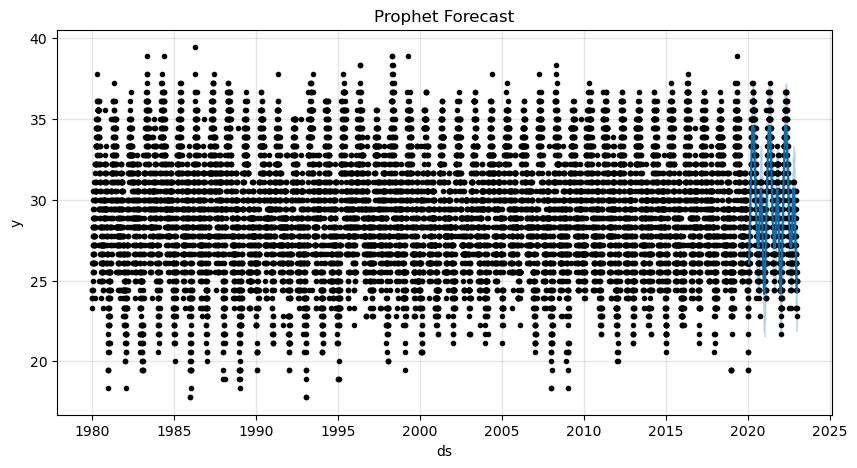

In [443]:
# plot the forecast
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(station_test_forecast, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

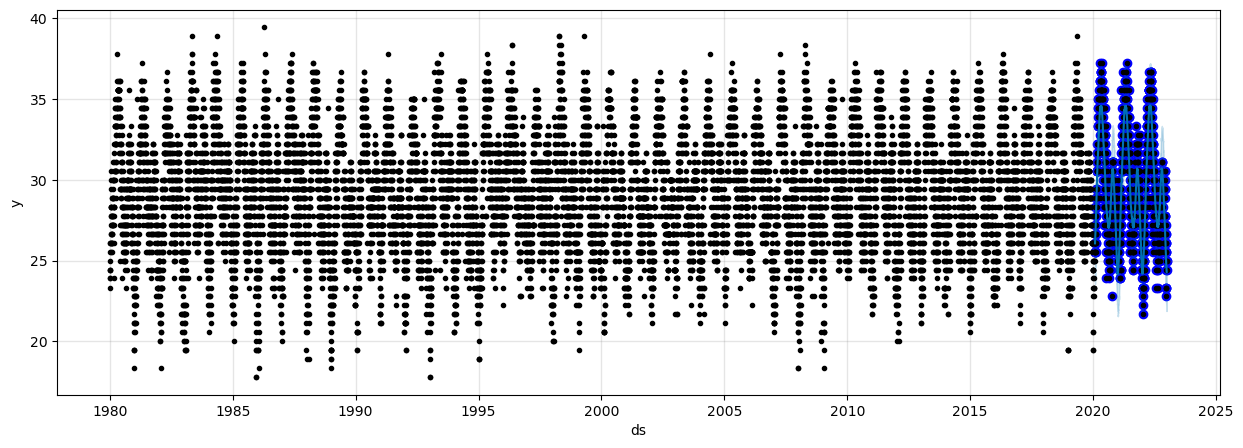

In [444]:
# Plot the forecast with the actuals
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test.index, test['UV000005502'], color='b')
fig = model.plot(station_test_forecast, ax=ax )

In [445]:
# okay, let's evalute our model
np.sqrt(mean_squared_error(y_true=test['UV000005502'],
                   y_pred= station_test_forecast['yhat']))

1.799221045907744

In [446]:
mean_absolute_error(y_true=test['UV000005502'],
                   y_pred=station_test_forecast['yhat'])

1.4264791405695054